# This is Shravanti's and my final project of the Data-Science Bootcamp at WBS Coding School

#### The main goal of our work is to use data of gas consumption and gas prices from the past 4 years (2018 - 2021) to predict consumption and prices for 2022, as if the Ukraine war would have not happened.
#### We will compare this predicted data to the actual data (01 - 07/2022) to show the effect of the war on the consumption and the prices.
#### As the last step, we will predict gas consumption and prices based on the current data (01 - 07/2022) with diffent scenarios of the gas supply by Russia.

### **This notebook will concatenate all data frames into one to do the modeling on that.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_price_2022 = pd.read_csv(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Cleaned/Gas prices/Final Data_Gas price EU_2022_daily.csv")
data_supply_2022 = pd.read_csv(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Cleaned/Gas supply/Final Data_Gas supply_2022_daily.csv")
data_infl_2022 = pd.read_csv(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Cleaned/Inflation/Final Data_Inflation EU_2022.csv")
data_cons_2022 = pd.read_csv(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Cleaned/Gas consumption/Final Data_Consumption_2022_daily.csv")

In [3]:
data_cons_2022

,year,month,day,Population,GDP,Renewable_energy,Price,Gas Consumption
0,2022,July,31,4.489117e+08,1.734780e+13,23.6575,204.125,153.6
1,2022,July,30,4.489117e+08,1.734780e+13,23.6575,198.250,148.7
2,2022,July,29,4.489117e+08,1.734780e+13,23.6575,192.375,352.7
3,2022,July,28,4.489117e+08,1.734780e+13,23.6575,200.350,371.9
4,2022,July,27,4.489117e+08,1.734780e+13,23.6575,206.985,431.4
...,...,...,...,...,...,...,...,...
207,2022,January,5,4.471017e+08,1.712565e+13,23.1625,82.940,4843.6
208,2022,January,4,4.471017e+08,1.712565e+13,23.1625,80.530,3961.6
209,2022,January,3,4.471017e+08,1.712565e+13,23.1625,72.610,3188.2
210,2022,January,2,4.471017e+08,1.712565e+13,23.1625,71.855,2377.0


In [4]:
data_cons_2022 = data_cons_2022.drop(data_cons_2022.columns[[3, 4, 5, 6]], axis = 1)
data_cons_2022

,year,month,day,Gas Consumption
0,2022,July,31,153.6
1,2022,July,30,148.7
2,2022,July,29,352.7
3,2022,July,28,371.9
4,2022,July,27,431.4
...,...,...,...,...
207,2022,January,5,4843.6
208,2022,January,4,3961.6
209,2022,January,3,3188.2
210,2022,January,2,2377.0


In [5]:
# selecting only consumption data from January - April 2022
data_cons_2022 = data_cons_2022.set_index("month")
data_cons_2022 = data_cons_2022.loc[["January", "February", "March", "April"]]
data_cons_2022 = data_cons_2022.reset_index()
data_cons_2022

,month,year,day,Gas Consumption
0,January,2022,31,6365.2
1,January,2022,30,4403.1
2,January,2022,29,4594.0
3,January,2022,28,6430.7
4,January,2022,27,6795.5
...,...,...,...,...
115,April,2022,5,1338.4
116,April,2022,4,1945.7
117,April,2022,3,1694.7
118,April,2022,2,1643.6


In [6]:
data_price_2022 = data_price_2022.drop(data_price_2022.columns[0], axis=1)
data_price_2022

,day,month,month_no,year,price
0,3,January,1,2022,80.435
1,4,January,1,2022,88.740
2,5,January,1,2022,91.520
3,6,January,1,2022,96.500
4,7,January,1,2022,88.175
...,...,...,...,...,...
141,25,July,7,2022,176.615
142,26,July,7,2022,199.920
143,27,July,7,2022,205.225
144,28,July,7,2022,198.930


In [7]:
# selecting only price data from January - April 2022
data_price_2022 = data_price_2022.set_index("month")
data_price_2022 = data_price_2022.loc[["January", "February", "March", "April"]]
data_price_2022 = data_price_2022.reset_index()
data_price_2022

,month,day,month_no,year,price
0,January,3,1,2022,80.435
1,January,4,1,2022,88.740
2,January,5,1,2022,91.520
3,January,6,1,2022,96.500
4,January,7,1,2022,88.175
...,...,...,...,...,...
79,April,25,4,2022,92.835
80,April,26,4,2022,103.210
81,April,27,4,2022,107.425
82,April,28,4,2022,100.142


In [8]:
data_supply_2022 = data_supply_2022.drop(data_supply_2022.columns[0], axis=1)
data_supply_2022

,day,month,month_no,year,Gas supply by Russia
0,1,January,1,2022,184.3
1,2,January,1,2022,186.1
2,3,January,1,2022,185.9
3,4,January,1,2022,187.3
4,5,January,1,2022,189.1
...,...,...,...,...,...
111,22,April,4,2022,196.8
112,23,April,4,2022,195.5
113,24,April,4,2022,195.4
114,25,April,4,2022,196.7


In [9]:
data_infl_2022 = data_infl_2022.drop(data_infl_2022.columns[0], axis=1)
data_infl_2022

,month,month_no,year,inflation rate
0,January,1,2022,5.1
1,February,2,2022,5.9
2,March,3,2022,7.4
3,April,4,2022,7.4
4,May,5,2022,8.1
5,June,6,2022,8.6
6,July,7,2022,8.9
7,August,8,2022,9.1
8,December,12,2021,5.0


In [10]:
# selecting only inflation data from January - April 2022
data_infl_2022 = data_infl_2022.set_index("month")
data_infl_2022 = data_infl_2022.loc[["January", "February", "March", "April"]]
data_infl_2022 = data_infl_2022.reset_index()
data_infl_2022

,month,month_no,year,inflation rate
0,January,1,2022,5.1
1,February,2,2022,5.9
2,March,3,2022,7.4
3,April,4,2022,7.4


In [11]:
# merge supply with consumption
final_df_gasprice_2022 = data_supply_2022.merge(data_cons_2022, how="left", on = ["day", "month", "year"])
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption
0,1,January,1,2022,184.3,1898.4
1,2,January,1,2022,186.1,2377.0
2,3,January,1,2022,185.9,3188.2
3,4,January,1,2022,187.3,3961.6
4,5,January,1,2022,189.1,4843.6
...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7
112,23,April,4,2022,195.5,175.3
113,24,April,4,2022,195.4,206.3
114,25,April,4,2022,196.7,657.0


In [12]:
# merge with price
final_df_gasprice_2022 = final_df_gasprice_2022.merge(data_price_2022, how="left", on = ["day", "month", "year"])
final_df_gasprice_2022

,day,month,month_no_x,year,Gas supply by Russia,Gas Consumption,month_no_y,price
0,1,January,1,2022,184.3,1898.4,NaN,NaN
1,2,January,1,2022,186.1,2377.0,NaN,NaN
2,3,January,1,2022,185.9,3188.2,1.0,80.435
3,4,January,1,2022,187.3,3961.6,1.0,88.740
4,5,January,1,2022,189.1,4843.6,1.0,91.520
...,...,...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7,4.0,94.875
112,23,April,4,2022,195.5,175.3,NaN,NaN
113,24,April,4,2022,195.4,206.3,NaN,NaN
114,25,April,4,2022,196.7,657.0,4.0,92.835


In [13]:
final_df_gasprice_2022 = final_df_gasprice_2022.drop(final_df_gasprice_2022.columns[6], axis=True)
final_df_gasprice_2022.rename(columns={final_df_gasprice_2022.columns[2]: "month_no"}, inplace=True)
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,price
0,1,January,1,2022,184.3,1898.4,NaN
1,2,January,1,2022,186.1,2377.0,NaN
2,3,January,1,2022,185.9,3188.2,80.435
3,4,January,1,2022,187.3,3961.6,88.740
4,5,January,1,2022,189.1,4843.6,91.520
...,...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7,94.875
112,23,April,4,2022,195.5,175.3,NaN
113,24,April,4,2022,195.4,206.3,NaN
114,25,April,4,2022,196.7,657.0,92.835


In [14]:
# merge with inflation
final_df_gasprice_2022 = final_df_gasprice_2022.merge(data_infl_2022, how="left", on = ["month", "year"])
final_df_gasprice_2022

,day,month,month_no_x,year,Gas supply by Russia,Gas Consumption,price,month_no_y,inflation rate
0,1,January,1,2022,184.3,1898.4,NaN,1,5.1
1,2,January,1,2022,186.1,2377.0,NaN,1,5.1
2,3,January,1,2022,185.9,3188.2,80.435,1,5.1
3,4,January,1,2022,187.3,3961.6,88.740,1,5.1
4,5,January,1,2022,189.1,4843.6,91.520,1,5.1
...,...,...,...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7,94.875,4,7.4
112,23,April,4,2022,195.5,175.3,NaN,4,7.4
113,24,April,4,2022,195.4,206.3,NaN,4,7.4
114,25,April,4,2022,196.7,657.0,92.835,4,7.4


In [15]:
final_df_gasprice_2022 = final_df_gasprice_2022.drop(final_df_gasprice_2022.columns[7], axis=True)
final_df_gasprice_2022.rename(columns={final_df_gasprice_2022.columns[2]: "month_no"}, inplace=True)
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,price,inflation rate
0,1,January,1,2022,184.3,1898.4,NaN,5.1
1,2,January,1,2022,186.1,2377.0,NaN,5.1
2,3,January,1,2022,185.9,3188.2,80.435,5.1
3,4,January,1,2022,187.3,3961.6,88.740,5.1
4,5,January,1,2022,189.1,4843.6,91.520,5.1
...,...,...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7,94.875,7.4
112,23,April,4,2022,195.5,175.3,NaN,7.4
113,24,April,4,2022,195.4,206.3,NaN,7.4
114,25,April,4,2022,196.7,657.0,92.835,7.4


In [16]:
final_df_gasprice_2022 = final_df_gasprice_2022[["day", "month", "month_no", "year", "Gas supply by Russia", "Gas Consumption", "inflation rate", "price"]]
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,inflation rate,price
0,1,January,1,2022,184.3,1898.4,5.1,NaN
1,2,January,1,2022,186.1,2377.0,5.1,NaN
2,3,January,1,2022,185.9,3188.2,5.1,80.435
3,4,January,1,2022,187.3,3961.6,5.1,88.740
4,5,January,1,2022,189.1,4843.6,5.1,91.520
...,...,...,...,...,...,...,...,...
111,22,April,4,2022,196.8,364.7,7.4,94.875
112,23,April,4,2022,195.5,175.3,7.4,NaN
113,24,April,4,2022,195.4,206.3,7.4,NaN
114,25,April,4,2022,196.7,657.0,7.4,92.835


In [17]:
final_df_gasprice_2022.loc[len(final_df_gasprice_2022.index)] = [31, "December", 12, 2021, 150, 4000, 1, 70.345]
final_df_gasprice_2022

/var/folders/5t/1jj49mj912v2j7kxwvyjvjym0000gn/T/ipykernel_5806/3194466886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_gasprice_2022.loc[len(final_df_gasprice_2022.index)] = [31, "December", 12, 2021, 150, 4000, 1, 70.345]


,day,month,month_no,year,Gas supply by Russia,Gas Consumption,inflation rate,price
0,1,January,1,2022,184.3,1898.4,5.1,NaN
1,2,January,1,2022,186.1,2377.0,5.1,NaN
2,3,January,1,2022,185.9,3188.2,5.1,80.435
3,4,January,1,2022,187.3,3961.6,5.1,88.740
4,5,January,1,2022,189.1,4843.6,5.1,91.520
...,...,...,...,...,...,...,...,...
112,23,April,4,2022,195.5,175.3,7.4,NaN
113,24,April,4,2022,195.4,206.3,7.4,NaN
114,25,April,4,2022,196.7,657.0,7.4,92.835
115,26,April,4,2022,196.5,698.1,7.4,103.210


In [18]:
final_df_gasprice_2022 = final_df_gasprice_2022.sort_values(["year", "month_no", "day"]).reset_index(drop=True)
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,inflation rate,price
0,31,December,12,2021,150.0,4000.0,1.0,70.345
1,1,January,1,2022,184.3,1898.4,5.1,NaN
2,2,January,1,2022,186.1,2377.0,5.1,NaN
3,3,January,1,2022,185.9,3188.2,5.1,80.435
4,4,January,1,2022,187.3,3961.6,5.1,88.740
...,...,...,...,...,...,...,...,...
112,22,April,4,2022,196.8,364.7,7.4,94.875
113,23,April,4,2022,195.5,175.3,7.4,NaN
114,24,April,4,2022,195.4,206.3,7.4,NaN
115,25,April,4,2022,196.7,657.0,7.4,92.835


In [19]:
final_df_gasprice_2022 = final_df_gasprice_2022.interpolate()
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,inflation rate,price
0,31,December,12,2021,150.0,4000.0,1.0,70.345000
1,1,January,1,2022,184.3,1898.4,5.1,73.708333
2,2,January,1,2022,186.1,2377.0,5.1,77.071667
3,3,January,1,2022,185.9,3188.2,5.1,80.435000
4,4,January,1,2022,187.3,3961.6,5.1,88.740000
...,...,...,...,...,...,...,...,...
112,22,April,4,2022,196.8,364.7,7.4,94.875000
113,23,April,4,2022,195.5,175.3,7.4,94.195000
114,24,April,4,2022,195.4,206.3,7.4,93.515000
115,25,April,4,2022,196.7,657.0,7.4,92.835000


In [20]:
final_df_gasprice_2022.isna().sum()

day                     0
month                   0
month_no                0
year                    0
Gas supply by Russia    0
Gas Consumption         0
inflation rate          0
price                   0
dtype: int64

In [21]:
final_df_gasprice_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   117 non-null    int64  
 1   month                 117 non-null    object 
 2   month_no              117 non-null    int64  
 3   year                  117 non-null    int64  
 4   Gas supply by Russia  117 non-null    float64
 5   Gas Consumption       117 non-null    float64
 6   inflation rate        117 non-null    float64
 7   price                 117 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 7.4+ KB


In [22]:
final_df_gasprice_2022 = final_df_gasprice_2022.drop(final_df_gasprice_2022.index[0], axis=0)
final_df_gasprice_2022

,day,month,month_no,year,Gas supply by Russia,Gas Consumption,inflation rate,price
1,1,January,1,2022,184.3,1898.4,5.1,73.708333
2,2,January,1,2022,186.1,2377.0,5.1,77.071667
3,3,January,1,2022,185.9,3188.2,5.1,80.435000
4,4,January,1,2022,187.3,3961.6,5.1,88.740000
5,5,January,1,2022,189.1,4843.6,5.1,91.520000
...,...,...,...,...,...,...,...,...
112,22,April,4,2022,196.8,364.7,7.4,94.875000
113,23,April,4,2022,195.5,175.3,7.4,94.195000
114,24,April,4,2022,195.4,206.3,7.4,93.515000
115,25,April,4,2022,196.7,657.0,7.4,92.835000


In [23]:
final_df_gasprice_2022.to_csv("Final DF_gasprice_2022.csv")

### **Ploting evolution of price during a year.**

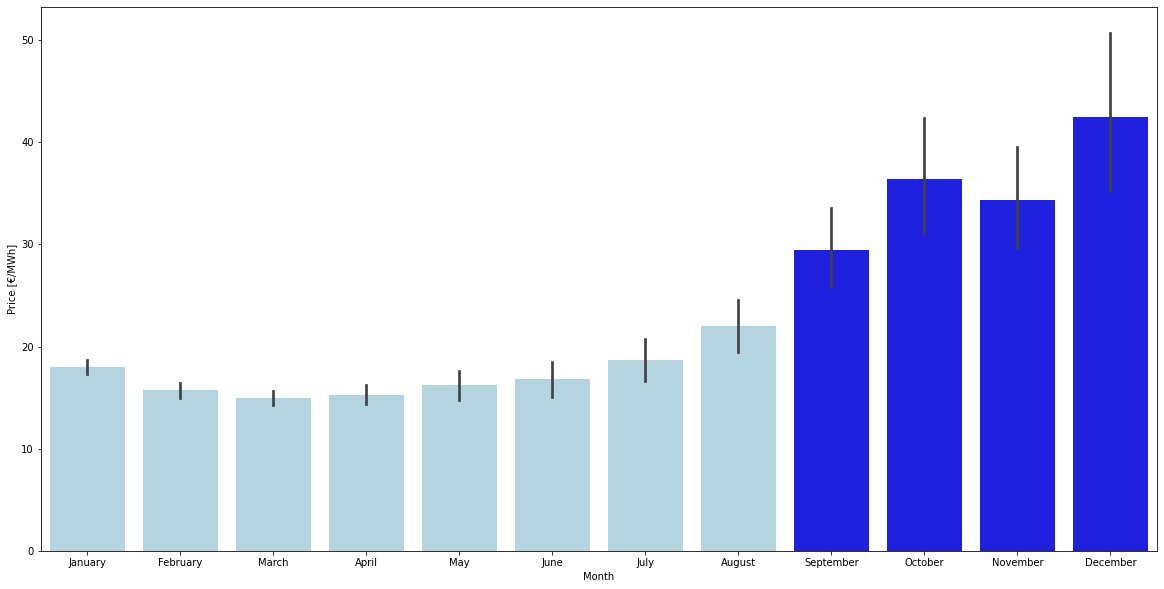

In [27]:
plt.subplots(figsize=(20, 10))

p = sns.barplot(
    data=final_df_gasprice_20xx, 
    x="month", 
    y="price",
    palette=["lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "blue", "blue", "blue", "blue"]
)

plt.xlabel("Month") 
plt.ylabel("Price [€/MWh]")
plt.ticklabel_format(style="plain", axis="y") # remove scientific notation for the y axis
plt.show() 